This file fixes the title column in data and replace them with actual unique title of corresponding sweet potato image. So that we get a table where the title column can be used as primary key

In [3]:
import pandas as pd
import numpy as np
#STEP 1 read in the file
data_filename='18NCGT0014HCR_xf.xlsx' #Change the name based on Cliton or Kinston

uncleaned_data=pd.read_excel(data_filename,sheet_name='Sheet1')

In [4]:
uncleaned_data.head(2)

,Title,trial,clone,plot,rep,concaveside,hourglass,bottleneck,longtapered,wedgeshape,...,color.16,colorarea.17,color.17,colorarea.18,color.18,colorarea.19,colorarea.20,date,time,Unnamed: 89
0,18NCGT0014HCR_L13-81_4010,18NCGT0014HCR,L13-81,4010,4,13,0,0,67,25,...,9,#904040,9,#705040,9,#704020,6,10022018,09:10:55,NaN
1,18NCGT0014HCR_L13-81_4010,18NCGT0014HCR,L13-81,4010,4,12,1,0,31,28,...,7,#706040,6,#605030,5,#503030,5,10022018,09:10:56,NaN


There are 90 fields in the dataset we will only keep 10:

- Title
- trial
- plot  : plot number for the cultivar replicate
- clone : Cultivar
- estimateddiameter : from exeter
- estimagedwieght : from exeter (*Note: there is a spelling mistake which should be fixed*)
- estimatedlength : from exeter
- apsectratio : (Not sure confirm with Dr. Zhang) (*Note: there is a spelling mistake*)
- date   
- time : timestamp for corresponding data

In [5]:
keep_columns=['Title','trial','clone','plot','estimateddiameter','estimagedweight','estimatedlength','apsectratio','date','time']

In [6]:
uncleaned_data_subset=uncleaned_data[keep_columns]
uncleaned_data_subset.head(2)

,Title,trial,clone,plot,estimateddiameter,estimagedweight,estimatedlength,apsectratio,date,time
0,18NCGT0014HCR_L13-81_4010,18NCGT0014HCR,L13-81,4010,180,40,484,287,10022018,09:10:55
1,18NCGT0014HCR_L13-81_4010,18NCGT0014HCR,L13-81,4010,213,60,415,209,10022018,09:10:56


Now rename the column names with typos

In [7]:
uncleaned_data_subset=uncleaned_data_subset.rename({'estimagedweight':'estimatedweight','apsectratio':'aspectratio'},axis=1)

In [8]:
uncleaned_data_subset.head(2)

,Title,trial,clone,plot,estimateddiameter,estimatedweight,estimatedlength,aspectratio,date,time
0,18NCGT0014HCR_L13-81_4010,18NCGT0014HCR,L13-81,4010,180,40,484,287,10022018,09:10:55
1,18NCGT0014HCR_L13-81_4010,18NCGT0014HCR,L13-81,4010,213,60,415,209,10022018,09:10:56


Create a column delta that will contain time difference between consecutive steps


In [9]:
#uncleaned_data_subset['difftime']=pd.to_timedelta(uncleaned_data_subset['time'].astype(str)).diff(1).dt.total_seconds().div(60)
uncleaned_data_subset['datetime']=pd.to_datetime(uncleaned_data_subset['date'].astype(str)+' '+uncleaned_data_subset['time'].astype(str),format='%m%d%Y %I:%M:%S',errors='coerce')
uncleaned_data_subset['difftime']=(uncleaned_data_subset['datetime'] - uncleaned_data_subset['datetime'].shift(1))

In [10]:
#uncleaned_data_subset['difftime'][1].total_seconds()

Now we have the time difference in seconds. There are some big jumps due to different dates and AM / PM discrepency which we will resolve later.

At this point we want to get the directory listing for all the images corresponding to the trial 

In [11]:
from os import listdir
from os.path import isfile, join
mypath='C:\\NCSUData\\18NCGT0014HCR\\Images'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [12]:
onlyfiles=pd.DataFrame(onlyfiles,columns=['fname'])


In [13]:
unique_title=uncleaned_data_subset['Title'].unique()
tmp=onlyfiles.copy()
uc_total=[];file_total=[];title_pattern=[]

for title in unique_title:
    #print(uncleaned_data_subset[uncleaned_data_subset['Title']==title].shape[0],onlyfiles[onlyfiles['fname'].str.contains(title)].shape[0],title)
    uc_total.append(uncleaned_data_subset[uncleaned_data_subset['Title']==title].shape[0])
    file_total.append(onlyfiles[onlyfiles['fname'].str.contains(title)].shape[0])
    title_pattern.append(title)
    tmp[tmp['fname'].str.contains(title)]='checked'
    
discrep=pd.DataFrame(list(zip(uc_total,file_total,title_pattern)),columns=['Rows_in_Excel','Image_Files_Count','Title_Pattern'])
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 19
print(discrep)


    Rows_in_Excel  Image_Files_Count                       Title_Pattern
0   112            112                18NCGT0014HCR_L13-81_4010         
1   116            116                18NCGT0014HCR_L13-84_6002         
2   100            100                18NCGT0014HCR_Beauregard_G2_6003  
3   93             93                 18NCGT0014HCR_Beauregard_G2_2006  
4   84             84                 18NCGT0014HCR_Beauregard_G2_3012  
5   98             98                 18NCGT0014HCR_NC05-0198_G2_6001   
6   121            121                18NCGT0014HCR_L417_2008           
7   89             89                 18NCGT0014HCR_NC05-0198_G2_1005   
8   86             85                 18NCGT0014HCR_NC05-0198_G2_3013   
9   90             90                 18NCGT0014HCR_NC05-0198_G2_4011   
10  94             94                 18NCGT0014HCR_NC05-0198_G2_2005   
11  103            103                18NCGT0014HCR_L13-84_3008         
12  16             16                 18NCGT0014HCR

Notice that no image file was found for title _2004 we use a tmp dataframe to findout the problem
We used the tmp dataframe to check which filename patterns were not found in the excell datasheet.

Now we print the image title that were not associated to any row in the dataset

In [14]:
tmp[tmp['fname']!='checked']

,fname
48,18ncgt0014 HCR_REP4_l13_81_4010_NIR_V1_O0005.tif
49,18ncgt0014 HCR_REP4_l13_81_4010_NIR_V1_O0006.tif
50,18ncgt0014 HCR_REP4_l13_81_4010_NIR_V1_O0007.tif
51,18ncgt0014 HCR_REP4_l13_81_4010_NIR_V1_O0008.tif
52,18ncgt0014A_cLINTON_NIR_V1_O0002.tif
53,18ncgt0014B_cLINTONnc_REP3_nc10-0118m28_g2_3004_NIR_V1_O0001.tif
3910,18ncgt0014HCR_REP3_nc10-0118m28_g2_3004_NIR_V1_O0001.tif
3911,18ncgt0014HCR_REP3_nc10-0118m28_g2_3004_NIR_V1_O0002.tif
3912,18ncgt0014HCR_REP3_nc10-0118m28_g2_3004_NIR_V1_O0003.tif
3913,18ncgt0014HCR_REP3_nc10-0118m28_g2_3004_NIR_V1_O0004.tif


We just found that _2004 plot number is named as _20004 in the image file names. 
For now we will changed the title column to have _20004 for consistency. 

In [15]:
uncleaned_data_subset[uncleaned_data_subset['Title']=='_2004']['Title']='_20004'

C:\Users\sahaqu\AppData\Local\Continuum\anaconda3\envs\kerasenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
unique_title=uncleaned_data_subset['Title'].unique()
tmp=onlyfiles.copy()
uc_total=[];file_total=[];title_pattern=[]

for title in unique_title:
    #print(uncleaned_data_subset[uncleaned_data_subset['Title']==title].shape[0],onlyfiles[onlyfiles['fname'].str.contains(title)].shape[0],title)
    uc_total.append(uncleaned_data_subset[uncleaned_data_subset['Title']==title].shape[0])
    file_total.append(onlyfiles[onlyfiles['fname'].str.contains(title)].shape[0])
    title_pattern.append(title)
    tmp[tmp['fname'].str.contains(title)]='checked'

In [17]:
discrep=pd.DataFrame(list(zip(uc_total,file_total,title_pattern)),columns=['Rows_in_Excel','Image_Files_Count','Title_Pattern'])
discrep['dif']=discrep['Rows_in_Excel']-discrep['Image_Files_Count']
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 19
print(discrep)

    Rows_in_Excel  Image_Files_Count                       Title_Pattern  dif
0   112            112                18NCGT0014HCR_L13-81_4010           0  
1   116            116                18NCGT0014HCR_L13-84_6002           0  
2   100            100                18NCGT0014HCR_Beauregard_G2_6003    0  
3   93             93                 18NCGT0014HCR_Beauregard_G2_2006    0  
4   84             84                 18NCGT0014HCR_Beauregard_G2_3012    0  
5   98             98                 18NCGT0014HCR_NC05-0198_G2_6001     0  
6   121            121                18NCGT0014HCR_L417_2008             0  
7   89             89                 18NCGT0014HCR_NC05-0198_G2_1005     0  
8   86             85                 18NCGT0014HCR_NC05-0198_G2_3013     1  
9   90             90                 18NCGT0014HCR_NC05-0198_G2_4011     0  
10  94             94                 18NCGT0014HCR_NC05-0198_G2_2005     0  
11  103            103                18NCGT0014HCR_L13-84_3008 

In [18]:
print(tmp[tmp['fname']!='checked'])
print(tmp[tmp['fname']!='checked'].shape[0])
print(tmp[tmp['fname']=='checked'].shape[0])

                                                                 fname
48    18ncgt0014 HCR_REP4_l13_81_4010_NIR_V1_O0005.tif                
49    18ncgt0014 HCR_REP4_l13_81_4010_NIR_V1_O0006.tif                
50    18ncgt0014 HCR_REP4_l13_81_4010_NIR_V1_O0007.tif                
51    18ncgt0014 HCR_REP4_l13_81_4010_NIR_V1_O0008.tif                
52    18ncgt0014A_cLINTON_NIR_V1_O0002.tif                            
53    18ncgt0014B_cLINTONnc_REP3_nc10-0118m28_g2_3004_NIR_V1_O0001.tif
3910  18ncgt0014HCR_REP3_nc10-0118m28_g2_3004_NIR_V1_O0001.tif        
3911  18ncgt0014HCR_REP3_nc10-0118m28_g2_3004_NIR_V1_O0002.tif        
3912  18ncgt0014HCR_REP3_nc10-0118m28_g2_3004_NIR_V1_O0003.tif        
3913  18ncgt0014HCR_REP3_nc10-0118m28_g2_3004_NIR_V1_O0004.tif        
3914  18ncgt0014HCR_REP3_nc10_0118m28_g2_3004_NIR_V1_O0005.tif        
3915  18ncgt0014HCR_REP3_nc10_0118m28_g2_3004_NIR_V1_O0006.tif        
3916  18ncgt0014HCR_REP3_nc10_0118m28_g2_3004_NIR_V1_O0007.tif        
3917  

These are the 26 files that have no representation in the excell file. (Most likely we can discard these files) 

There are mismathces in datasheet entry and image files in the following replicates 
- _18NCGT0014HCR_Beauregard_G2_6003
- _18NCGT0014HCR_Beauregard_G2_3012
- 18NCGT0014HCR_NC05-0198_G2_3013
- 18NCGT0014HCR_Burgundy_G2_1003
- 18NCGT0014HCR_NC10-0118M25_G2_6009
- 18NCGT0014HCR_Orleans_G2_5002
- 18NCGT0014HCR_Orleans_G2_2011
- _2001
- _4013 --> *118-84*
- _1013 --> *90-124* I beleive 34 rows were swaped from one cultivar to another need to fix this 
- _5009
- _5004 
- _5001
- _6014
- _5003
- _3014

Now we will check the time stamps diffrence for each of this replicates to look for discrepency
    

In [19]:
print(discrep[discrep['dif']!=0])
diff_cultivars=discrep[discrep['dif']!=0]['Title_Pattern']

    Rows_in_Excel  Image_Files_Count                       Title_Pattern  dif
8   86             85                 18NCGT0014HCR_NC05-0198_G2_3013     1  
18  92             93                 18NCGT0014HCR_Burgundy_G2_1003     -1  
20  89             90                 18NCGT0014HCR_NC10-0118M25_G2_6009 -1  
22  114            112                18NCGT0014HCR_Orleans_G2_5002       2  
30  81             80                 18NCGT0014HCR_Orleans_G2_2011       1  
49  88             87                 _2001                               1  
60  148            0                  _2004                               148
64  104            103                _5009                               1  
79  64             63                 _3014                               1  


In [20]:
for title in diff_cultivars:
    subset=uncleaned_data_subset[uncleaned_data_subset['Title']==title]
    subset['difftime'] = pd.to_timedelta(subset['difftime'], errors='coerce')
    subset['difftime']=subset['difftime'].dt.total_seconds()  
    print(subset.loc[subset['difftime']>10,['Title','clone','plot','date','time']])

C:\Users\sahaqu\AppData\Local\Continuum\anaconda3\envs\kerasenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sahaqu\AppData\Local\Continuum\anaconda3\envs\kerasenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


                               Title      clone  plot      date      time
813  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013  10022018  09:44:36
882  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013  10022018  09:46:39
                               Title     clone  plot      date      time
1501  18NCGT0014HCR_Burgundy_G2_1003  Burgundy  1003  10022018  10:53:41
1576  18NCGT0014HCR_Burgundy_G2_1003  Burgundy  1003  10022018  10:55:55
                                   Title         clone  plot      date  \
1680  18NCGT0014HCR_NC10-0118M25_G2_6009  NC10-0118M25  6009  10022018   
1745  18NCGT0014HCR_NC10-0118M25_G2_6009  NC10-0118M25  6009  10022018   

          time  
1680  11:00:42  
1745  11:03:29  
                              Title    clone  plot      date      time
1827  18NCGT0014HCR_Orleans_G2_5002  Orleans  5002  10022018  11:10:05
1828  18NCGT0014HCR_Orleans_G2_5002  Orleans  5002  10022018  11:10:17
1882  18NCGT0014HCR_Orleans_G2_5002  Orleans  5002  10022018  11:12:40
 

In [21]:
for title in diff_cultivars:
    subset=uncleaned_data_subset[uncleaned_data_subset['Title']==title]
    #subset['difftime'] = pd.to_timedelta(subset['difftime'], errors='coerce')
    #subset['difftime']=subset['difftime'].dt.total_seconds()  
    print(subset[['Title','clone','plot']])

                               Title      clone  plot
813  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
814  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
815  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
816  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
817  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
818  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
819  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
820  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
821  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
822  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
823  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
824  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
825  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
826  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
827  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
828  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
829  18NCGT0014HCR_NC05-0198_G2_3013  NC05-0198  3013
830  18NCGT0014HCR_NC05-0198

Let's assign a new column for sweetpotato grades

In [22]:
uncleaned_data_subset['USDA_GRADE']='unknown'

In [56]:
uncleaned_data_subset['estimateddiameter'].describe()

count    6873.000000
mean     221.625200 
std      61.384329  
min      89.000000  
25%      176.000000 
50%      213.000000 
75%      259.000000 
max      484.000000 
Name: estimateddiameter, dtype: float64

In [23]:
def assign_grades(df):
    df['USDA_GRADE']='unknown'
    #creating boolean flags to filter data 
    US_No_2=(df['estimateddiameter']>=150)&(df['estimatedweight']<=360)
    
    US_No_1_pt= (df['estimateddiameter']>= 150) & (df['estimateddiameter']<=225) \
    & (df['estimatedlength']>=300) & (df['estimatedlength']<=700)

    US_No_1=(df['estimateddiameter']>=175) & (df['estimateddiameter']<=350) \
    & (df['estimatedlength']>=300) & (df['estimatedlength']<=900) \
    & (df['estimatedweight']>=180) & (df['estimatedweight']<=200) \

    US_No_1_Ex=(df['estimateddiameter']>=175) & (df['estimateddiameter']<=325) \
    & (df['estimatedlength']>=300) & (df['estimatedlength']<=900) \
    & (df['estimatedweight']<=180)

    Jumbo= (df['estimatedweight']>=220) | (df['estimateddiameter']>=350) | (df['estimatedlength']>=900)

    Trash= (df['estimateddiameter']<100) | (df['estimatedlength']<200)
    df['USDA_GRADE'][US_No_2]='US_NO_2'
    df['USDA_GRADE'][US_No_1_pt]='US_NO_1_Petite'
    df['USDA_GRADE'][US_No_1]='US_NO_1'
    df['USDA_GRADE'][US_No_1_Ex]='US_NO_1_Extra'
    df['USDA_GRADE'][Jumbo]='Jumbo'
    df['USDA_GRADE'][Trash]='Trash'
    return df

    

In [24]:
uncleaned_data_subset=assign_grades(uncleaned_data_subset)

C:\Users\sahaqu\AppData\Local\Continuum\anaconda3\envs\kerasenv\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sahaqu\AppData\Local\Continuum\anaconda3\envs\kerasenv\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sahaqu\AppData\Local\Continuum\anaconda3\envs\kerasenv\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sahaqu\AppData\Local\Cont

In [61]:
#creating boolean flags to filter data 
US_No_2=(uncleaned_data_subset['estimateddiameter']>=150)&(uncleaned_data_subset['estimatedweight']<=360)


In [107]:

US_No_1_pt= (uncleaned_data_subset['estimateddiameter']>= 150) & (uncleaned_data_subset['estimateddiameter']<=225) \
& (uncleaned_data_subset['estimatedlength']>=300) & (uncleaned_data_subset['estimatedlength']<=700)

US_No_1=(uncleaned_data_subset['estimateddiameter']>=175) & (uncleaned_data_subset['estimateddiameter']<=350) \
& (uncleaned_data_subset['estimatedlength']>=300) & (uncleaned_data_subset['estimatedlength']<=900) \
& (uncleaned_data_subset['estimatedweight']>=180) & (uncleaned_data_subset['estimatedweight']<=200) \

US_No_1_Ex=(uncleaned_data_subset['estimateddiameter']>=175) & (uncleaned_data_subset['estimateddiameter']<=325) \
& (uncleaned_data_subset['estimatedlength']>=300) & (uncleaned_data_subset['estimatedlength']<=900) \
& (uncleaned_data_subset['estimatedweight']<=180)

Jumbo= (uncleaned_data_subset['estimatedweight']>=220) | (uncleaned_data_subset['estimateddiameter']>=350) | (uncleaned_data_subset['estimatedlength']>=900)

Trash= (uncleaned_data_subset['estimateddiameter']<100) | (uncleaned_data_subset['estimatedlength']<200)

In [25]:
uncleaned_data_subset.head()


,Title,trial,clone,plot,estimateddiameter,estimatedweight,estimatedlength,aspectratio,date,time,datetime,difftime,USDA_GRADE
0,18NCGT0014HCR_L13-81_4010,18NCGT0014HCR,L13-81,4010,180,40,484,287,10022018,09:10:55,2018-10-02 09:10:55,NaT,US_NO_1_Extra
1,18NCGT0014HCR_L13-81_4010,18NCGT0014HCR,L13-81,4010,213,60,415,209,10022018,09:10:56,2018-10-02 09:10:56,00:00:01,US_NO_1_Extra
2,18NCGT0014HCR_L13-81_4010,18NCGT0014HCR,L13-81,4010,233,82,577,274,10022018,09:10:57,2018-10-02 09:10:57,00:00:01,US_NO_1_Extra
3,18NCGT0014HCR_L13-81_4010,18NCGT0014HCR,L13-81,4010,222,88,642,293,10022018,09:10:58,2018-10-02 09:10:58,00:00:01,US_NO_1_Extra
4,18NCGT0014HCR_L13-81_4010,18NCGT0014HCR,L13-81,4010,184,40,450,263,10022018,09:10:59,2018-10-02 09:10:59,00:00:01,US_NO_1_Extra


In [108]:
uncleaned_data_subset['USDA_GRADE'][US_No_2]='US_NO_2'
uncleaned_data_subset['USDA_GRADE'][US_No_1_pt]='US_NO_1_Petite'
uncleaned_data_subset['USDA_GRADE'][US_No_1]='US_NO_1'
uncleaned_data_subset['USDA_GRADE'][US_No_1_Ex]='US_NO_1_Extra'
uncleaned_data_subset['USDA_GRADE'][Jumbo]='Jumbo'
uncleaned_data_subset['USDA_GRADE'][Trash]='Trash'

C:\Users\sahaqu\AppData\Local\Continuum\anaconda3\envs\kerasenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sahaqu\AppData\Local\Continuum\anaconda3\envs\kerasenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sahaqu\AppData\Local\Continuum\anaconda3\envs\kerasenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

In [109]:
uncleaned_data_subset['USDA_GRADE'].value_counts()

US_NO_1_Extra     4230
US_NO_1_Petite    864 
unknown           689 
US_NO_2           598 
Jumbo             357 
US_NO_1           117 
Trash             18  
Name: USDA_GRADE, dtype: int64

In [111]:
uncleaned_data_subset[uncleaned_data_subset['USDA_GRADE']=='unknown'].tail(5)

,Title,trial,clone,plot,estimateddiameter,estimatedweight,estimatedlength,aspectratio,date,time,datetime,difftime,USDA_GRADE
6817,_3014,18NCGT0014HCR,NC15-0185,3014,125,19,411,338,10042018,02:04:30,2018-10-04 02:04:30,00:00:01,unknown
6819,_3014,18NCGT0014HCR,NC15-0185,3014,139,17,313,238,10042018,02:04:34,2018-10-04 02:04:34,00:00:01,unknown
6847,_3014,18NCGT0014HCR,NC15-0185,3014,139,19,277,213,10042018,02:05:25,2018-10-04 02:05:25,00:00:01,unknown
6850,_3014,18NCGT0014HCR,NC15-0185,3014,148,27,412,292,10042018,02:05:28,2018-10-04 02:05:28,00:00:01,unknown
6853,_3014,18NCGT0014HCR,NC15-0185,3014,139,16,281,212,10042018,02:05:31,2018-10-04 02:05:31,00:00:00,unknown


['US_NO_1_Extra', 'US_NO_1_Petite', 'unknown', 'US_NO_2', 'Jumbo', 'US_NO_1', 'Trash']
[4230, 864, 689, 598, 357, 117, 18]
[0 1 2 3 4 5 6]


Text(0, 0.5, 'Portion of total count (%)')

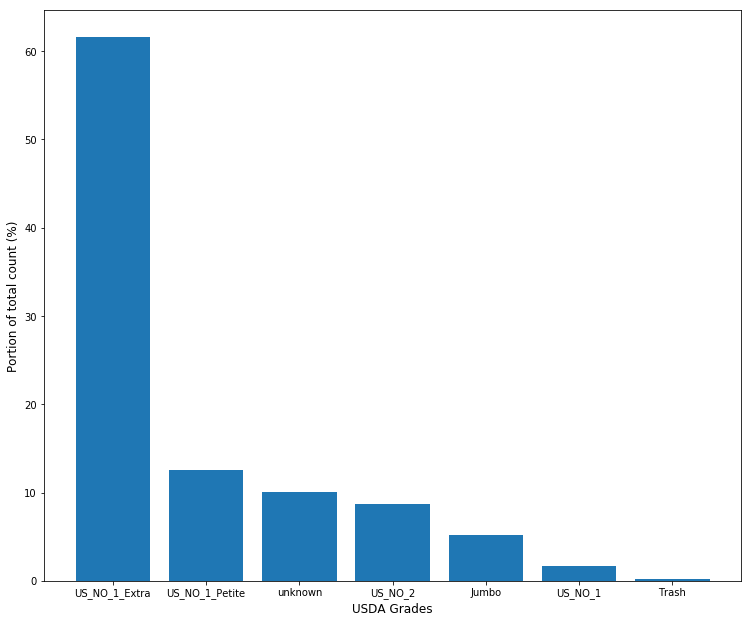

In [86]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
count=uncleaned_data_subset['USDA_GRADE'].value_counts()
grades=uncleaned_data_subset['USDA_GRADE'].value_counts().index.tolist()
count_val=uncleaned_data_subset['USDA_GRADE'].value_counts().values.tolist()

ax.bar(y_pos,count_val/np.sum(count_val)*100)
ax.set_xticks(np.arange(len(grades)))
ax.set_xticklabels(grades, rotation = 0,fontsize=10)
plt.rc('ytick',labelsize= 10)
ax.set_ylabel('Portion of total yield')
ax.set_xlabel('USDA Grades')
fig.set_size_inches(12.5, 10.5)
print(grades)
print(count_val)
print(y_pos)
plt.xlabel('USDA Grades',fontsize=12)
plt.ylabel('Portion of total count (%)',fontsize=12)

24


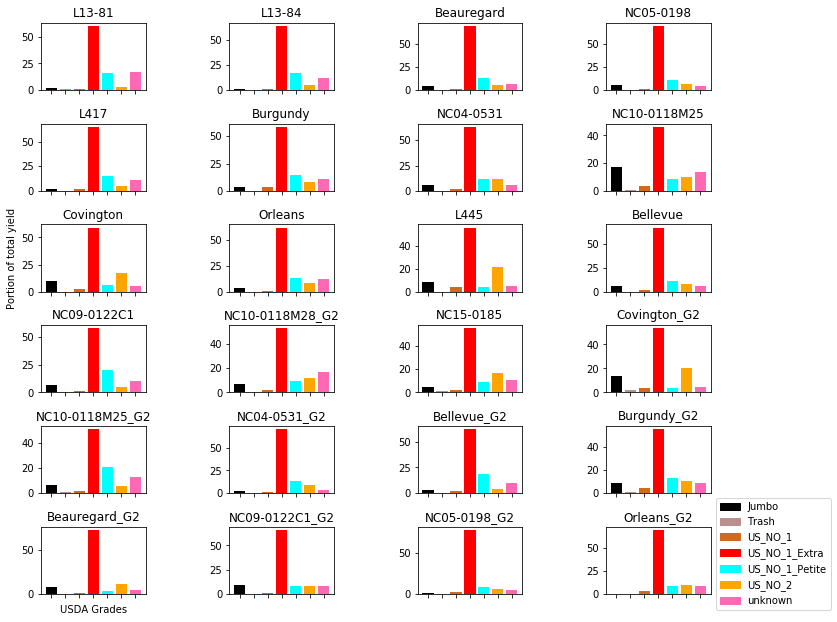

<Figure size 432x288 with 0 Axes>

In [192]:
cultivars=uncleaned_data_subset['clone'].unique()
print(len(cultivars))
fig, ax=plt.subplots(ncols=4,nrows=6)
col=0
row=0
grades=uncleaned_data_subset['USDA_GRADE'].value_counts().sort_index().index.to_list()

for clone in cultivars:
    df=uncleaned_data_subset[uncleaned_data_subset['clone']==clone]      
    tmp_ax=ax[row,col]
    count_val=[]
    for g in grades:
        count_val.append(df[df['USDA_GRADE']==g].shape[0])        

    tmp_ax.bar(np.arange(len(grades)),count_val/np.sum(count_val)*100,color=['black', 'rosybrown', 'chocolate', 'red', 'cyan','orange','hotpink'])
    tmp_ax.set_xticks(np.arange(len(grades)))
    tmp_ax.set_title(clone)
    if row==5:
        tmp_ax.set_xticklabels([], rotation = 0,fontsize=8)
    else:
        tmp_ax.set_xticklabels([''], rotation = 0,fontsize=8)
    #plt.rc('ytick',labelsize= 10)
    if (col==0) & (row==2):
        tmp_ax.set_ylabel('Portion of total yield')
    
    if (col==0) & (row==5):
        tmp_ax.set_xlabel('USDA Grades')         
        
    col+=1
    if col==4:
        col=0
        row+=1
    
fig.set_size_inches(12, 10.5)    
cmp=['black', 'rosybrown', 'chocolate', 'red', 'cyan','orange','hotpink']
patches=[]
import matplotlib.patches as mpatches
for i in range(len(grades)):
    p = mpatches.Patch(color=cmp[i], label=grades[i])
    patches.append(p)                  
               
                              
plt.legend(handles=patches,loc='best', bbox_to_anchor=(1, 1, 0.5, 0.5))
f=plt.figure()
fig.subplots_adjust(hspace=0.5,wspace=0.8)
fig.savefig("grade_distribution.pdf",bbox_inches='tight')


In [165]:
patches, labels = fig.get_legend_handles_labels()
fig.legend(patches, labels, loc='best')

AttributeError: 'Figure' object has no attribute 'get_legend_handles_labels'